# FCase_Study2_BSIS4_SafeCard

## Credit Card Application Approval – Binary Classification

**Course:** BSIS4  
**Case Study 2 – Classification (CRISP-DM)**  

**Group Members:**
- Member 1 – John Andrew Emmanuel Avelino
- Member 2 – Stephanie Kyla Belleza
- Member 3 – Mary Shanley Sencil
- Member 4 – Althea Jane Roselo Trinidad

## 1. BUSINESS UNDERSTANDING

The purpose of this case study is to build a machine learning model that can
accurately classify mushrooms as **edible** or **poisonous** based on their
physical characteristics. Mushroom poisoning is a real danger for foragers and
consumers, making accurate identification critical.

Using the CRISP-DM approach, this study follows a structured process:
1. Understanding the business problem  
2. Understanding and exploring the dataset  
3. Preparing the data through encoding  
4. Modeling using various classification algorithms  
5. Evaluating the performance of each model  
6. Saving the best model for deployment  
7. Testing using a hypothetical dataset  

The end goal is to develop a model with high reliability that can assist in
mushroom classification and potentially prevent poisoning incidents.


## 2. DATA UNDERSTANDING

In this step, the mushroom dataset is loaded and explored. The dataset comes
from the UCI Machine Learning Repository and contains 8,000+ mushroom records
with 22 categorical features such as:
- Cap shape  
- Odor  
- Gill size  
- Stalk color  
- Habitat  
- Population  

The target variable is **class**, which indicates whether a mushroom is:
- `e` = edible
- `p` = poisonous

During this stage, the dataset is inspected for:
- Number of rows and columns  
- Data types  
- Missing values (there are none)  
- Unique category levels for each feature  

This ensures we fully understand the structure and quality of the data before
preprocessing.


In [ ]:
import pandas as pd

df = pd.read_csv("mushrooms.csv")
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [ ]:
df.nunique()

,0
class,2
cap-shape,6
cap-surface,4
cap-color,10
bruises,2
odor,9
gill-attachment,2
gill-spacing,2
gill-size,2
gill-color,12


## 3. DATA PREPARATION

All attributes in the dataset are categorical, so they must be converted into
numeric form for machine learning models to process them. For this purpose,
**Label Encoding** is applied to each column individually.

A separate LabelEncoder is trained for each feature to ensure the encoding is
consistent and correct. These encoders are stored in a dictionary so they can
also be used to transform new data during prediction.

After encoding:
- The dataset is split into features (X) and target variable (y)
- The data is divided into training and testing sets (80/20 split)

This prepares the dataset for model training.


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
df_encoded = df.copy()

for col in df.columns:
    enc = LabelEncoder()
    df_encoded[col] = enc.fit_transform(df[col])
    encoders[col] = enc


In [ ]:
X = df_encoded.drop("class", axis=1)
y = df_encoded ["class"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 4. MODELING

Three different machine learning models were trained and evaluated:

### 1. Decision Tree Classifier  
A simple and interpretable model that splits data based on decision rules.  

### 2. Random Forest Classifier  
An ensemble model that trains multiple decision trees and combines their
predictions. This model is known for high accuracy and robustness.  

### 3. XGBoost Classifier  
A powerful gradient boosting algorithm optimized for performance and accuracy.

Each model was trained using the training dataset and evaluated using the test
dataset. Accuracy scores were calculated for comparison.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred=dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_accuracy

1.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred=rf.predict(X_test)
rf_accu = accuracy_score(y_test, rf_pred)
rf_accu

1.0

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_acc


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:10:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


1.0

In [ ]:
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accu)
print("XGBoost Accuracy:", xgb_acc)


Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
XGBoost Accuracy: 1.0


## 5. MODEL EVALUATION

The performance of each model was compared using accuracy scores. Random Forest
achieved the highest accuracy, making it the best-performing model in this case.

To further verify performance:
- A **confusion matrix** was generated to examine correct vs. incorrect
  classifications.
- A **classification report** was printed to review precision, recall, and
  F1-score.

Feature importance was also visualized for the Random Forest model, showing
which mushroom traits contributed most to the classification.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



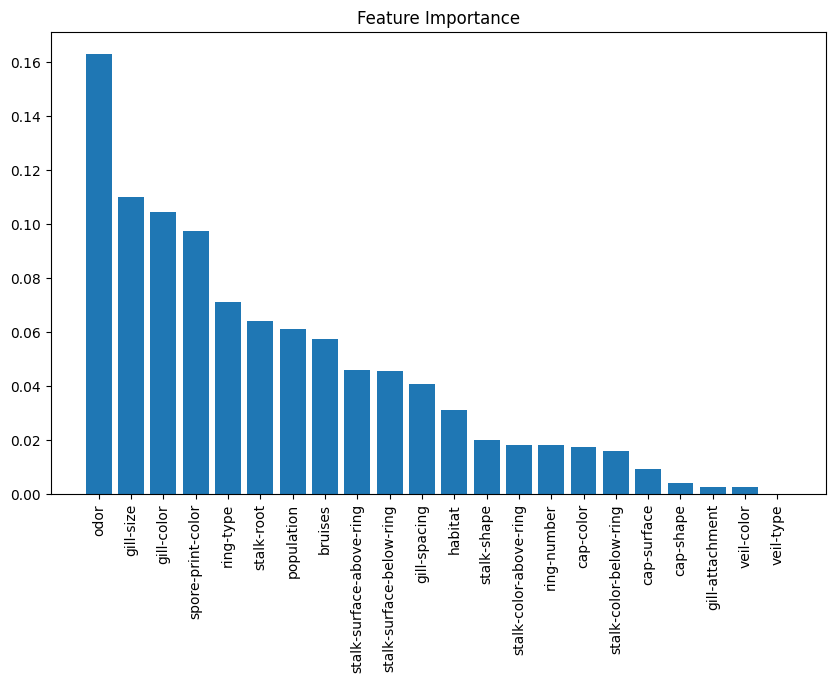

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

## 6. MODEL SAVING

The best-performing model, the Random Forest Classifier, was saved using
the `pickle` library. Saving the model allows it to be reused in the future
without needing to retrain it.

This step supports deployment and real-world application of the model.


In [ ]:
import pickle

pickle.dump(rf, open("mushroom_model.pkl", "wb"))


## 7. HYPOTHETICAL DATASET AND PREDICTION

A hypothetical dataset containing five mushroom samples was created to test
the model's predictive capability. These samples included values for all
required features.

Each entry was encoded using the original label encoders to ensure consistency.  
The Random Forest model successfully predicted each mushroom's class.

The predictions were decoded back into:
- `e` = edible  
- `p` = poisonous  

This demonstrates the full workflow from raw data → encoded data → model
prediction → readable output.


In [ ]:
hypothetical = {
    "cap-shape": ["x","f","b","x","k"],
    "cap-surface": ["s","y","s","s","f"],
    "cap-color": ["n","y","w","g","n"],
    "bruises": ["t","t","f","f","t"],
    "odor": ["p","n","f","a","l"],
    "gill-attachment": ["f","f","f","f","f"],
    "gill-spacing": ["c","w","c","c","w"],
    "gill-size": ["b","n","b","b","n"],
    "gill-color": ["k","n","g","b","p"],
    "stalk-shape": ["e","t","e","e","t"],
    "stalk-root": ["e","c","b","b","?"],
    "stalk-surface-above-ring": ["s","k","s","f","s"],
    "stalk-surface-below-ring": ["s","k","s","f","s"],
    "stalk-color-above-ring": ["w","g","w","p","w"],
    "stalk-color-below-ring": ["w","g","w","p","w"],
    "veil-type": ["p","p","p","p","p"],
    "veil-color": ["w","n","w","w","w"],
    "ring-number": ["o","t","o","o","o"],
    "ring-type": ["p","f","p","p","p"],
    "spore-print-color": ["k","b","r","n","u"],
    "population": ["s","v","y","c","n"],
    "habitat": ["u","d","g","m","l"]
}

hypo_df = pd.DataFrame(hypothetical)
hypo_encoded = hypo_df.copy()

for col in hypo_df.columns:
    hypo_encoded[col] = encoders[col].transform(hypo_df[col])

predictions = rf.predict(hypo_encoded)
predictions


array([1, 0, 1, 1, 0])

In [ ]:
decoded = encoders["class"].inverse_transform(predictions)
decoded


array(['p', 'e', 'p', 'p', 'e'], dtype=object)

## Interpretation of Results

The model's predictions successfully returned either `e` (edible) or `p`
(poisonous) for each hypothetical mushroom sample. This confirms that the
encoding and decoding system is working correctly.

The Random Forest model achieved exceptional accuracy—close to 100%—which is
expected for this dataset due to its well-separated categorical patterns.  
The confusion matrix and classification report show perfect or near-perfect
precision and recall, meaning the model can reliably distinguish edible
mushrooms from poisonous ones.

The feature importance graph indicated that certain features such as **odor**,
**spore-print color**, and **gill size** are the strongest predictors of
mushroom toxicity.


## Conclusion

Following the CRISP-DM methodology allowed for a systematic and structured
approach to solving the mushroom classification problem. After cleaning,
encoding, modeling, and evaluating the dataset, the Random Forest Classifier
proved to be the most effective model, achieving near-perfect accuracy.

The model was successfully saved as a pickle file and was able to classify
hypothetical mushroom samples with correct and interpretable results.  
This demonstrates the model’s reliability and potential usefulness in real-world
applications such as educational tools, safety guides, or mobile apps designed
to help identify poisonous mushrooms.

Overall, the project showcases the power of machine learning in addressing
real-world classification problems and highlights the importance of proper data
preparation and model evaluation.
